In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Regression Evaluation

Why do we evaluate models?
    
- Does this model add any value?
- Which model is better?
- How confident am I in my model's predictions?

Slides: https://docs.google.com/presentation/d/1WE9JfHrWg3IzqFhUP1eaV5-1fhv2-eRF0S7AyWqMBLc/edit#slide=id.p

TL:DR  

- RMSE: how much error does the typical prediction has; same units as the target; smaller is better  
- R2: variance in y (target) explained by X (predictor); closer to 1 is better




#### Can we predict the final grade of students based on score from 1st quiz

x = score from exam1  
y = final grade

In [2]:
# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head()

,x,y
0,100,96
1,93,90
2,84,89
3,80,85
4,76,80


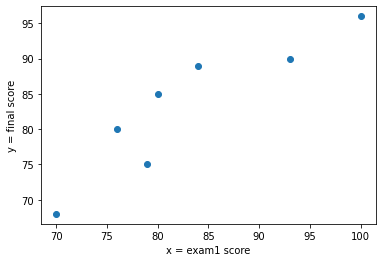

In [3]:
# look at scatter of x vs y
plt.scatter(df.x, df.y)
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score');

Linear Regression:  
     - Does a set of independent variables do a good job in predicting an outcome (dependent) variable  
     - Is the model good enough compared to a baseline?  
     - Is the model with features/ind variable valuable/significant compared to a model with no features?  

### Create a baseline prediction.
- Make a prediction just based on dependent variable i.e. model with no independent variable
    - mean or median of dependent variable (we will use mean for this lesson)

In [4]:
baseline = df.y.mean()
baseline

83.28571428571429

In [5]:
#baseline is mean of dependent variable
df['baseline'] = df.y.mean()
df.head()

,x,y,baseline
0,100,96,83.285714
1,93,90,83.285714
2,84,89,83.285714
3,80,85,83.285714
4,76,80,83.285714


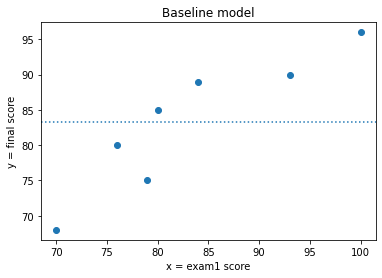

In [6]:
# plot data with baseline:

plt.scatter(df.x, df.y)
plt.axhline(df.y.mean(), ls = ':')
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('Baseline model');

In [7]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(df[['x']], df.y)

# make prediction
df['yhat'] = lm.predict(df[['x']])

df

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418
5,70,68,83.285714,72.097968
6,79,75,83.285714,79.759142


y = Actual target  
yhat = OLS model prediction

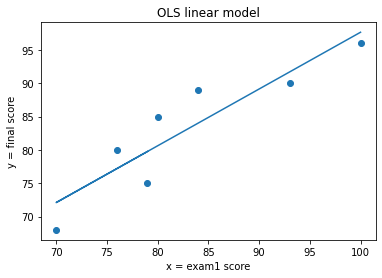

In [8]:
# visualize the line of best fit from OLS linear model
plt.scatter(df.x, df.y)
plt.plot(df.x, df.yhat)
plt.xlabel('x = exam1 score')
plt.ylabel('y = final score')
plt.title('OLS linear model');

## Regression Metrics: Measure of dispersion/distance of datapoints around the fitted line

### Regression Metrics :

- Compare to baseline
- Compare different models with different independent variables

### Vocabulary 
- Residual - error (actual minus predicted)
- SSE (sum of squared error)
- MSE (mean squared error)
- RMSE (root mean squared error)

### Residuals (error)

- predicted minus actual

In [9]:
df.head()

,x,y,baseline,yhat
0,100,96,83.285714,97.635214
1,93,90,83.285714,91.676524
2,84,89,83.285714,84.015350
3,80,85,83.285714,80.610384
4,76,80,83.285714,77.205418


In [10]:
# residual = actual - predicted
df['residual'] = df.y - df.yhat
df['baseline_residual'] = df.y - df.baseline

In [11]:
df

,x,y,baseline,yhat,residual,baseline_residual
0,100,96,83.285714,97.635214,-1.635214,12.714286
1,93,90,83.285714,91.676524,-1.676524,6.714286
2,84,89,83.285714,84.015350,4.984650,5.714286
3,80,85,83.285714,80.610384,4.389616,1.714286
4,76,80,83.285714,77.205418,2.794582,-3.285714
5,70,68,83.285714,72.097968,-4.097968,-15.285714
6,79,75,83.285714,79.759142,-4.759142,-8.285714


In [ ]:
# Do we prefer higher residuals or lower residuals

# What is the sum of residuals for these models?

### Residuals for Baseline model
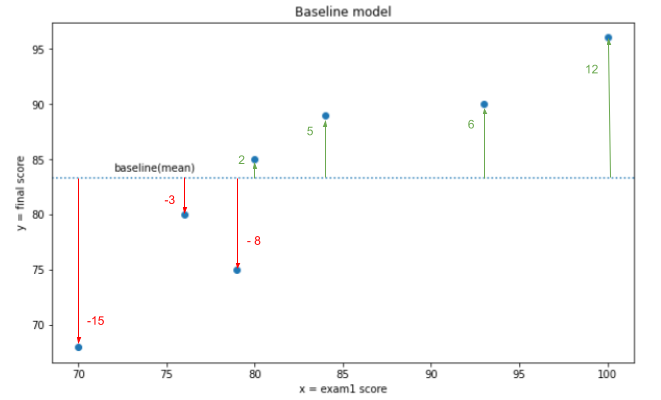

### Residuals for OLS model
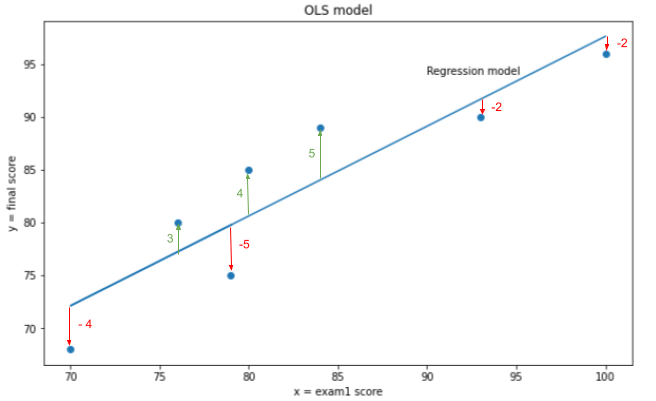

In [12]:
# sum of residual is zero
df.residual.sum()

-1.4210854715202004e-14

In [13]:
# sum of baseline residual is zero too
df.baseline_residual.sum()

-4.263256414560601e-14

##### Sum of residual is zero for both model above so 'residuals' are not helpful in finding the line of best fit
 - This is true for any line passing through the centeroid 

### Residual Plots:
- Independent variable vs residual values
- dependent variable vs residual values

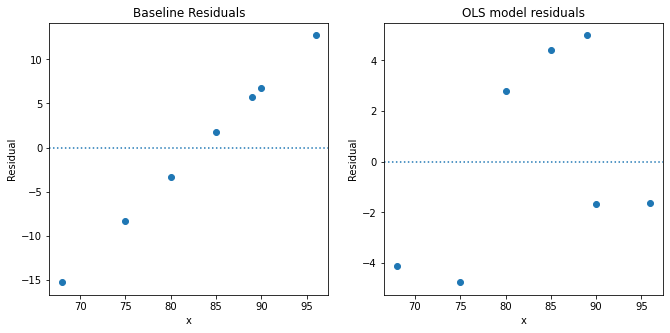

In [14]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.y, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.y, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

***Presence of trends in residual plots indicate that there is an uncaptured linear trend, meaning we can still improve our model using independent features (in this case x).***

### SSE (Sum of Squared Errors)

- sum the squared of residuals

In [15]:
# first calculate the square of residuals

df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,x,y,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,100,96,83.285714,97.635214,-1.635214,12.714286,2.673926,161.653061
1,93,90,83.285714,91.676524,-1.676524,6.714286,2.810732,45.081633
2,84,89,83.285714,84.015350,4.984650,5.714286,24.846737,32.653061
3,80,85,83.285714,80.610384,4.389616,1.714286,19.268731,2.938776
4,76,80,83.285714,77.205418,2.794582,-3.285714,7.809691,10.795918


In [16]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE = 96.9
SSE Baseline = 555.4


what are the units of residual, SSE?

##### Note: In regression, the 'line of best fit' is one which minimizes the SSE

### MSE (Mean Squared Error)

- average of SSE = SSE/(no. of data points)

- the average of your errors that have each been squared

In [17]:
len(df)
df.shape[0]

7

In [18]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE =  13.8
MSE baseline =  79.3


### RMSE (Root Mean Squared Error)

- Square root of MSE
- Same units as the output (y) variable

In [19]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)


print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE =  3.7
RMSE baseline =  8.9


### Metrics in Sklearn:
https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics


Start with MSE : (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

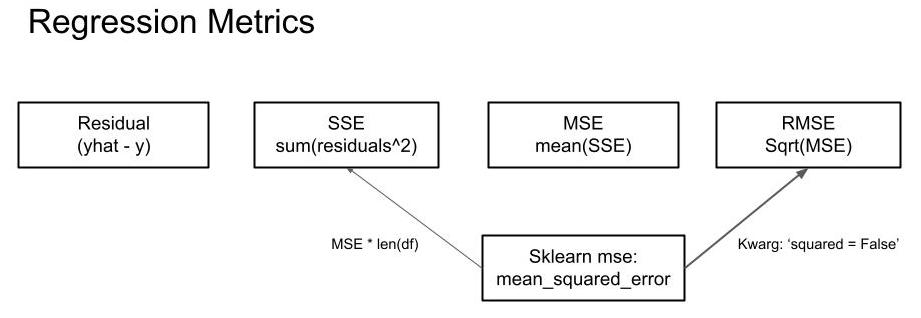

In [20]:
from sklearn.metrics import mean_squared_error

MSE2 = mean_squared_error(df.y, df.yhat)
MSE2_baseline = mean_squared_error(df.y, df.baseline)

print("MSE", MSE2) 
print("MSE baseline" ,MSE2_baseline) 

MSE 13.836085133827794
MSE baseline 79.34693877551021


In [21]:
#calculate SSE

SSE2 = MSE2 * len(df)
SSE2_baseline = MSE2_baseline * len(df)

print("SSE", SSE2) 
print("SSE baseline" ,SSE2_baseline) 

SSE 96.85259593679456
SSE baseline 555.4285714285714


In [22]:
#calculate RMSE: either take square root of MSE or use sklearn (kwarg 'squared = False')

RMSE2 = mean_squared_error(df.y, df.yhat, squared = False)
RMSE2_baseline = mean_squared_error(df.y, df.baseline, squared=False)

print("RMSE", RMSE2) 
print("RMSE baseline" ,RMSE2_baseline)  

RMSE 3.719688849060872
RMSE baseline 8.907689867497083


### Which metric to use?

Most often used:

- RMSE - Most commonly used - Same units as the dependent variable. Average distance of each point from fitted regression line


-------------------------------------------------------------
- SSE - If outliers matter, you can use SSE - Amplifies the effect of outliers

    - Residual 5 ----> SSE 25
    - Residual 10 ---> SSE 100




### How much of variance in target variable is explained by your independent variables?

 - $R^2$ - Coefficient of determination (0 to 1)
     - r2_score == explained_variance_score
 - Compares the fit of the chosen model with that of a horizontal straight line (baseline)



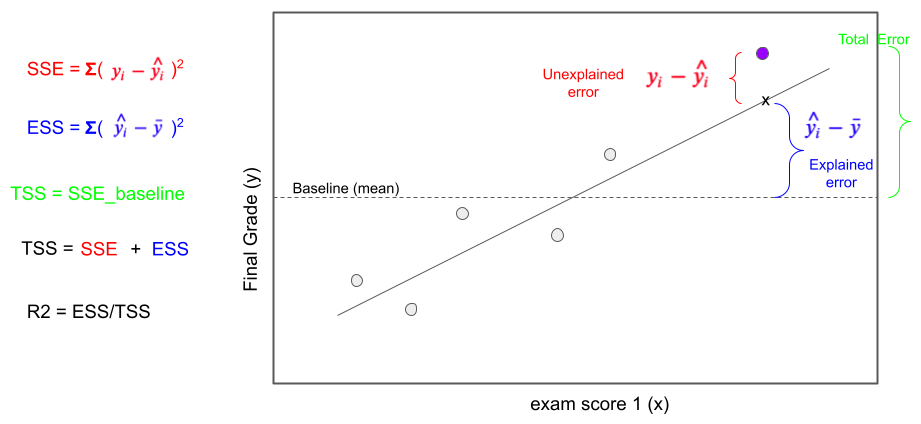

Distance between the point (value) and mean value (baseline) is 'Total Error'  
Total Error = 'Explained Error' (accounted by for regression) + 'Unexplained Error'  

ESS = Explained Sum of Squared Error  
TSS = Total sum of squared error

$R^2$ = ESS/TSS

$R^2$ = 1 - SSE/TSS  (since ESS + SSE = TSS)

*Note: TSS == SSE for baseline model (mean model)*

In [23]:
# calculate R2 manually:

# Total Sum of Squares = SSE for baseline
TSS = SSE_baseline =   df['baseline_residual^2'].sum()

# Sum of squared error for the regression line (Unexplained error)
SSE = df['residual^2'].sum()

# ESS - Explained sum of squares ('Explained Error')
ESS = TSS - SSE

# Calculate R2
R2 = ESS/TSS
R2

0.8256254702784048

In [24]:
# calculate R2 the easy way:

from sklearn.metrics import r2_score
r2_score(df.y, df.yhat)

0.8256254702784048

Note: explained_variance_score == r2_score